# Problem 2

## Data Generated Randomly

In [0]:
from random import *
from matplotlib import pyplot
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression
from pandas import DataFrame

class GenerateData():
  def logisticRegre(self):
    # generate 2d classification dataset
    X2, y2 = make_blobs(n_samples=100, centers=2, n_features=2)
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x=X2[:,0], y=X2[:,1], label=y2))
    colors = {0:'red', 1:'blue'}
    fig, ax = pyplot.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    pyplot.show()
    return X2, y2
  def linearRegre(self):
    # generate regression dataset
    X1, y1 = make_regression(n_samples=100, n_features=3, noise=0.3)
    # plot regression dataset
    pyplot.scatter(X1[:,0]+X1[:,1]+X1[:,2],y1)
    pyplot.show()
    return X1, y1
  def kMeans(self):
    # generate 2d classification dataset
    X3, y3 = make_blobs(n_samples=100, centers=3, n_features=2)
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x=X3[:,0], y=X3[:,1], label=y3))
    colors = {0:'red', 1:'blue', 2:'green'}
    fig, ax = pyplot.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    pyplot.show()
    return X3, y3

# Problem Statement 3

## 3(a)

In [0]:
class LinearRegression():
    def __init__(self, X, y, alpha=0.03, n_iter=1500):

        self.alpha = alpha
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = np.hstack((np.ones(
            (self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y[:, np.newaxis]
        self.params = np.zeros((self.n_features + 1, 1))
        self.coef_ = None
        self.intercept_ = None

    def fit(self):

        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * \
            self.X.T @ (self.X @ self.params - self.y)

        self.intercept_ = self.params[0]
        self.coef_ = self.params[1:]

        return self

    def score(self, X=None, y=None):

        if X is None:
            X = self.X
        else:
            n_samples = np.size(X, 0)
            X = np.hstack((np.ones(
                (n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y[:, np.newaxis]

        y_pred = X @ self.params
        score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return score

    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) \
                            / np.std(X, 0))) @ self.params
        return y

    def get_params(self):
        return self.params

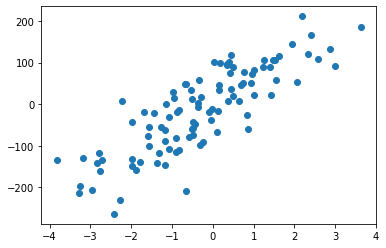

,0
Training Accuracy,0.999992
Test Accuracy,0.740540


In [0]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

gd = GenerateData()
X, y = gd.linearRegre()

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)

our_regressor = LinearRegression(X_train, y_train).fit()

our_train_accuracy = our_regressor.score()

our_test_accuracy = our_regressor.score(X_test, y_test)

pd.DataFrame([[our_train_accuracy],
              [our_test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'])

## 3(b)

In [0]:
from matplotlib import pyplot as plt

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold
    def plot(self):
        plt.figure(figsize=(10, 6))
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
        plt.legend()
        x1_min, x1_max = X[:,0].min(), X[:,0].max(),
        x2_min, x2_max = X[:,1].min(), X[:,1].max(),
        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
        grid = np.c_[xx1.ravel(), xx2.ravel()]
        probs = model.predict_prob(grid).reshape(xx1.shape)
        plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');


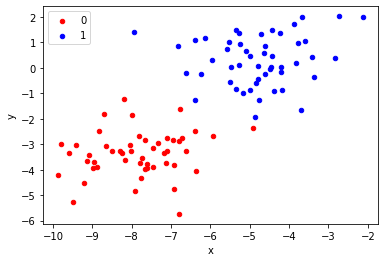

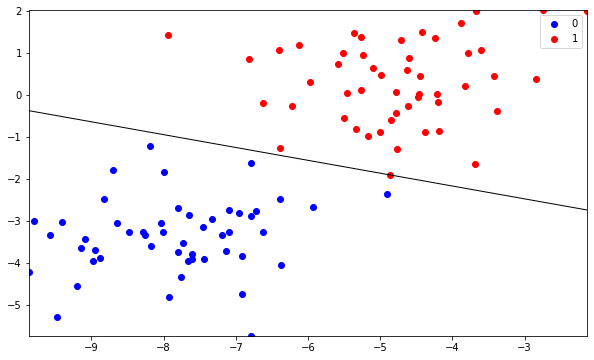

In [0]:
gd = GenerateData()
X, y = gd.logisticRegre()
Y = y.reshape(-1,1)# This will reshape Y as a column vector. conversally reshape(1,-1) will reshape an array as row vector

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
model.plot()

## 3(c)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
plt.rcParams['figure.figsize'] = (5.0, 5.0)

class RidgeLinearRegression:
       def __init__(self,X_data,Y_data,l,l2,iterations): #initialize all parameters
           self.X=X_data
           self.Y=Y_data
           #weight and bias
           self.m=0
           self.c=0
           self.L=l #learning rate
           self.l2=l2 #regularization parameter
           self.iter=iterations #num of iterations
           self.n=float(len(self.X))  #size of data
       
       def cost(self,pred_y): #cost function
           cost=np.sum(np.square(self.Y-pred_y))/(2*self.n) + self.l2*np.sum(np.square(self.m))
           return(cost)
       
       def fit(self):
           self.history=np.zeros(self.iter)
           #updating values of m and c
           for i in range(self.iter):
               pred_y=self.m*self.X + self.c
               #print(pred_y)
               Dm= (-2/self.n)*(self.X*(self.Y-pred_y))+2*self.l2*self.m
               Dc= (-2/self.n)*(self.Y-pred_y)
               #update
               self.m=self.m-Dm*self.L
               self.c=self.c-Dc*self.L
               #cost is calculated for every iteration
               self.history[i]=self.cost(pred_y)
           self.mse=self.MSE(self.Y,pred_y)
               
               
       def MSE(self,pred_y,Y):
           errors=Y-pred_y #error is the difference between actual and predicted value
           mse=np.sum(np.square(errors))/self.n #mean of sum of square of erros
           return mse
       
       def results(self):
           fig=plt.figure(figsize=(14,14))
           a1=fig.add_subplot(211)

           plt.title('minimisation of errors across the iterations')
           a1.plot(self.history)


           #making predictions
           a2=fig.add_subplot(212)
           final_y=self.m*self.X +self.c 
           plt.scatter(self.X,self.Y)
           plt.title('regrssion line')
           a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='red') #plotting the red line 
           
           plt.show()
           
           print ('Mean Squared Error=',self.mse)

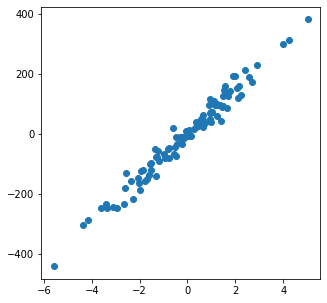

In [0]:
gd = GenerateData()
X, y = gd.linearRegre()
l=RidgeLinearRegression(X[:,0],y,0.005,0.001,1000)

In [0]:
l.fit()

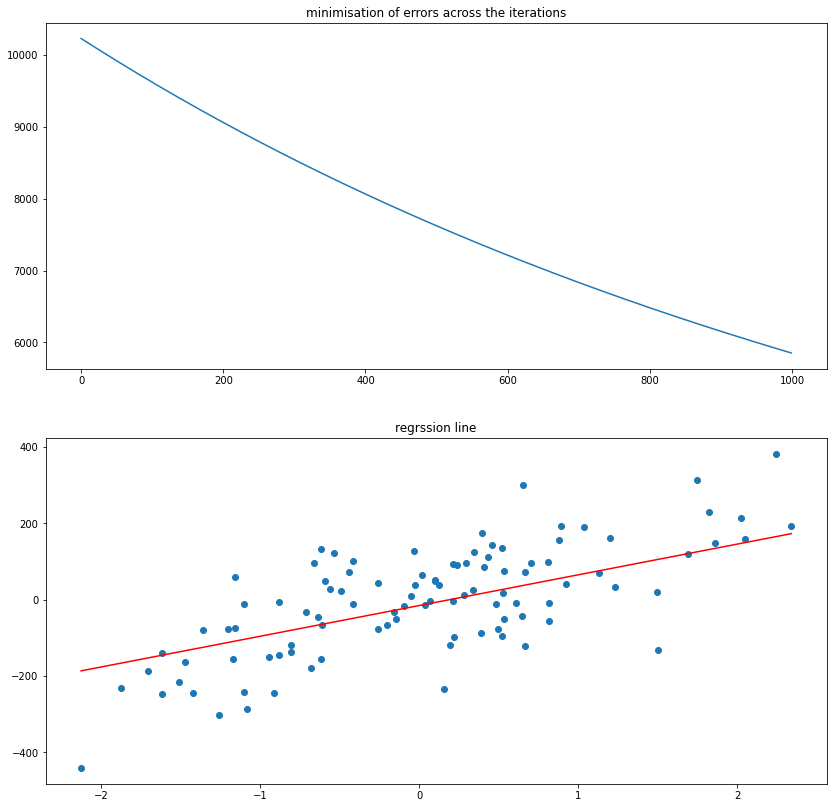

Mean Squared Error= 11652.18800286837


In [0]:
l.results()

L2 Linear Regression

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
plt.rcParams['figure.figsize'] = (5.0, 5.0)

class LassoLinearRegression:
       def __init__(self,X_data,Y_data,l,l1,iterations): #initialize all parameters
           self.X=X_data
           self.Y=Y_data
           #weight and bias
           self.m=np.random.randn(X_data.shape[0])
           self.c=0
           self.L=l #learning rate
           self.l1=l1 #regularization parameter
           self.iter=iterations #num of iterations
           self.n=float(len(X_data))  #size of data
       
       def cost(self,pred_y): #cost function
           cost=np.sum(np.square(self.Y-pred_y))/(2*self.n) + self.l1*np.sum(self.m)
           return(cost)
       
       def fit(self):
           self.history=np.zeros(self.iter)
           pred_y=np.zeros((self.Y.shape))
           for j in range(self.iter):
               for i in range(0,len(self.X)):
                       pred_y[i]=self.m[i]*self.X[i]+self.c
                       if self.m[i]>0:
                           Dm= (-2/self.n)*(self.X[i]*(self.Y[i]-pred_y[i]))-self.l1 
                       else:
                           Dm= (-2/self.n)*(self.X[i]*(self.Y[i]-pred_y[i]))+self.l1


                       Dc= (-2/self.n)*(self.Y[i]-pred_y[i])
                       #update
                       self.m[i]=self.m[i]-Dm*self.L
                       self.c=self.c-Dc*self.L
               self.history[j]=self.cost(pred_y)
           self.mse=self.MSE(self.Y,pred_y)

             
      
       def MSE(self,pred_y,Y):
           errors=Y-pred_y #error is the difference between actual and predicted value
           mse=np.sum(np.square(errors))/self.n #mean of sum of square of erros
           return mse
       
       def results(self):
           fig=plt.figure(figsize=(14,14))
           a1=fig.add_subplot(211)

           plt.title('minimisation of errors across the iterations')
           a1.plot(self.history)


           #making predictions
           a2=fig.add_subplot(212)
           final_y=self.m*self.X +self.c 
           plt.scatter(self.X,self.Y)
           plt.title('regrssion line')
           a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='red') #plotting the red line 
           
           plt.show()
           
           print ('Mean Squared Error=',self.mse)

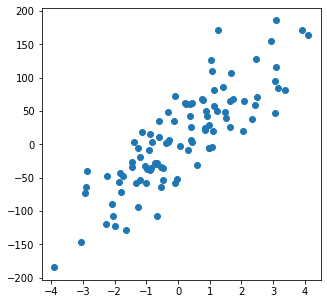

In [0]:
gd = GenerateData()
X, y = gd.linearRegre()
l=LassoLinearRegression(X[:,0],y,0.005,0.001,1000)

In [0]:
l.fit()

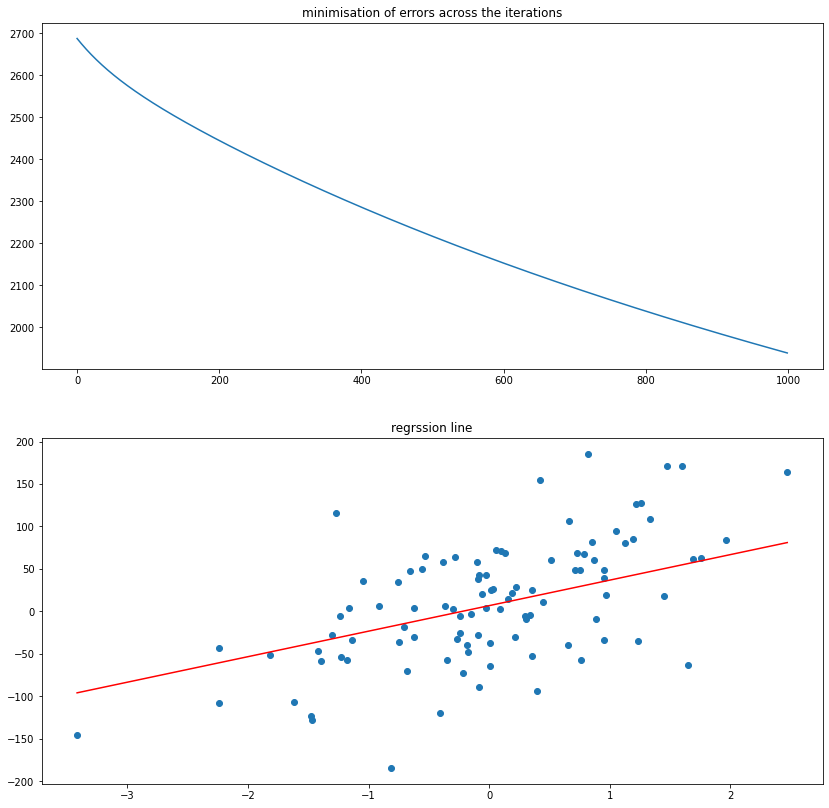

Mean Squared Error= 3877.765109937189


In [0]:
l.results()

## 3(d)

In [0]:
import numpy as np
# import tensorflow
# import utils
import math
import scipy 
from scipy import optimize
import random
# from touvlo import utils

class RegLogisticRegressor:

    def __init__(self):
        self.theta = None

    def train(self,X,y,var,reg=1e-5,num_iters=400,norm=True):
        num_train,dim = X.shape

        # standardize features if norm=True

        if norm:
            # take out the first column and do the feature normalize
            X_without_1s = X[:,1:]
            X_norm, mu, sigma = self.std_features(X_without_1s)
            # add the ones back
            XX = np.vstack([np.ones((X_norm.shape[0],)),X_norm.T]).T
        else:
            XX = X

        # initialize theta
        theta = np.zeros((dim,))

        # Run scipy's fmin algorithm to run gradient descent
        if var == "L1":
            theta_opt_norm = scipy.optimize.fmin_bfgs(self.lossL1, theta, fprime = self.grad_loss, args=(XX,y,reg),maxiter=num_iters)
        else:
            theta_opt_norm = scipy.optimize.fmin_bfgs(self.lossL2, theta, fprime = self.grad_loss, args=(XX,y,reg),maxiter=num_iters)



        if norm:
            # convert theta back to work with original X
            theta_opt = np.zeros(theta_opt_norm.shape)
            theta_opt[1:] = theta_opt_norm[1:]/sigma
            theta_opt[0] = theta_opt_norm[0] - np.dot(theta_opt_norm[1:],mu/sigma)
        else:
            theta_opt = theta_opt_norm


        return theta_opt

    def lossL1(self, *args):
        theta,X,y,reg = args
        m,dim = X.shape
        J = 0

        J = ((-np.array([y])).dot(np.log(self.sigmoid(X.dot((np.array([theta])).T))))[0,0]-(1-np.array([y])).dot(np.log(1-self.sigmoid(X.dot((np.array([theta])).T))))[0,0])/m + reg*np.array(([theta]))[0,0]/(2*m)

        return J

    def lossL2(self, *args):
        theta,X,y,reg = args
        m,dim = X.shape
        J = 0

        J = ((-np.array([y])).dot(np.log(self.sigmoid(X.dot((np.array([theta])).T))))[0,0]-(1-np.array([y])).dot(np.log(1-self.sigmoid(X.dot((np.array([theta])).T))))[0,0])/m + reg*np.array([theta]).dot(np.array([theta]).T)[0,0]/(2*m)

        return J

    def grad_loss(self, *args):
        theta,X,y,reg = args
        m,dim = X.shape
        grad = np.zeros((dim,))
        grad = ((self.sigmoid((np.array([theta])).dot(X.T))-np.array([y])).dot(X))[0]/m
        grad[1:] = grad[1:] + reg*theta[1:]/m

        return grad
        

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])

        y_pred = self.sigmoid((np.array([self.theta])).dot(X.T))[0]

        return y_pred

      
    def sigmoid(self, z):
        sig = np.zeros(z.shape)
        sig = 1/(1+np.exp(-z))
        return sig

    def log_features(self, X):
        logf = np.zeros(X.shape)
        # Your code here
        logf = np.log(X+0.1)
        # End your ode
        return logf

    def std_features(self, X):
        mu = np.mean(X,axis=0)
        sigma = np.std(X,axis=0)
        X_norm = (X - mu) / sigma
        return X_norm, mu, sigma

    def bin_features(self, X):
        tX = np.zeros(X.shape)
        # your code here
        tX[X>0] = 1
        # end your code
        return tX
      

    def select_lambda_crossval(self, X,y,lambda_low,lambda_high,lambda_step,penalty):
      
        
        best_lambda = lambda_low

        # Your code here
        # Implement the algorithm above.

        lambda_test = lambda_low
        highest_accuracy =0.0
        
        while(lambda_test<=lambda_high):       
            sk_logreg_l1 = linear_model.LogisticRegression(C=1.0/lambda_test,solver='liblinear',fit_intercept=False,penalty='l1')
            sk_logreg_l2 = linear_model.LogisticRegression(C=1.0/lambda_test,solver='sag',fit_intercept=False)       
            if (penalty == "l1"):
                sk_logreg = sk_logreg_l1
            elif (penalty == "l2"):
                sk_logreg = sk_logreg_l2
            else:
                print ("error in penalty")  
                break                     
            kf = cross_validation.KFold(X.shape[0], n_folds = 10)        
            cumulate_accuracy = 0.0
            for train_set,test_set in kf:
                X_train, X_test = X[train_set], X[test_set]
                y_train,y_test = y[train_set],y[test_set]
                sk_logreg.fit(X_train,y_train)
                #print "Theta found by sklearn with ",penalty," regularization " ,sk_logreg.coef_[0]
                y_predict = sk_logreg.predict(X_test)
                sub_accuracy = 1- np.nonzero(np.round(y_predict - y_test))[0].size/float(y_test.shape[0])
                #print "The accuracy is ", sub_accuracy
                cumulate_accuracy = cumulate_accuracy+sub_accuracy
                #print "cumulate accuracy is ", cumulate_accuracy
            accuracy = cumulate_accuracy/10
            if(accuracy>highest_accuracy):
                highest_accuracy = accuracy
                best_lambda = lambda_test        
            lambda_test = lambda_test + lambda_step
            

        # end your code

        return best_lambda




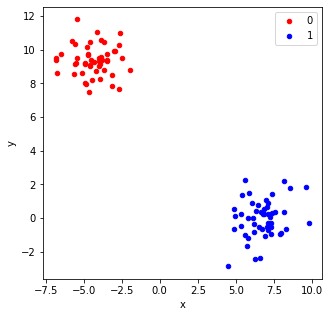

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19


array([16.34620953, -3.54516214])

In [0]:
gd = GenerateData()
X, y = gd.logisticRegre()
Y = y.reshape(-1,1)# This will reshape Y as a column vector. conversally reshape(1,-1) will reshape an array as row vector

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)
model = RegLogisticRegressor()
model.train(X_train, y_train, 'L1')

In [0]:

gd = GenerateData()
X, y = gd.logisticRegre()
Y = y.reshape(-1,1)# This will reshape Y as a column vector. conversally reshape(1,-1) will reshape an array as row vector

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)
model = RegLogisticRegressor()
model.train(X_train, y_train, 'L2')

## 3(e)
Here we apply K means algorithm

In [0]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

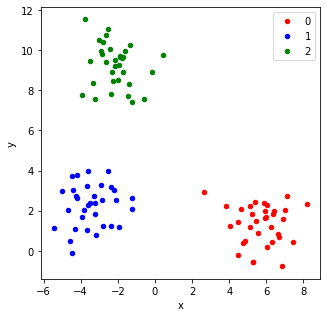

3.408760226601059
85.11933878002955


In [0]:
gd = GenerateData()
X, y = gd.kMeans()
clf = K_Means()
clf.fit(X)

In [0]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction == y[i]:
        correct += 1
print(correct/len(X))

0.67
